# Regresión logística para clasificación binaria
Para este parcial, usé eñ dataset 'Skytrax' Air Travel Reviews Dataset, especificamente las reviews de aeropuertos, el propósito es "predecir" si un pasajero recomentaría un aeropuerto, tomando en cuenta las siguientes características:
- Tipo de viajero
- Rating general
- Rating de colas
- Rating limpieza terminal
- Rating comida/bebidas
- Rating tiendas
- Rating WiFi

In [1]:
import numpy as np
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


## Carga de Datos

In [2]:
data = np.loadtxt('airport_clean.csv', delimiter=',', skiprows=1)
X = data[:, :-1]
y = data[:, -1]
X_original = X.copy()  # Guarda antes de normalizar

## Normalización de los Datos

In [3]:
# 2. Normalización (Z-score)
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / (std + 1e-8)

X_normalized = normalize(X)

## Agrega el término de intersección

In [4]:
X = np.concatenate([np.ones((X.shape[0], 1)), X_normalized], axis=1)

## División del dataset en datos de entrenamiento, validación y prueba

In [5]:
indices = np.random.permutation(len(X))
train_size = int(0.7 * len(X))
val_size = int(0.15 * len(X))

X_train, X_val, X_test = (
    X[indices[:train_size]],
    X[indices[train_size:train_size + val_size]],
    X[indices[train_size + val_size:]]
)
y_train, y_val, y_test = (
    y[indices[:train_size]],
    y[indices[train_size:train_size + val_size]],
    y[indices[train_size + val_size:]]
)

## Función Sigmoidea
La hipotesis para la regresión logistica se define como:

$$ h_\theta(x) = g(\theta^T x)$$

donde la función $g$ is la función sigmoidea. La función sigmoidea se define como:

$$g(z) = \frac{1}{1+e^{-z}}$$

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## Funciones para calcular la precisión y el costo
La funcion de costo en una regresión logistica es:

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

In [7]:
def accuracy(X, y, theta):
    return np.mean((sigmoid(X.dot(theta)) >= 0.5).astype(int) == y) * 100

def compute_cost(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    return (1 / m) * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))

## Función de descenso por el gradiente
El gradiente del costo es un vector de la misma longitud como $\theta$ donde el elemento $j^{th}$ (para $j = 0, 1, \cdots , n$) se define como:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

In [8]:
def gradient_descent(X_train, y_train, X_val, y_val, theta, alpha, iterations):
    m = len(y_train)
    train_cost_history = []
    val_cost_history = []
    train_acc_history = []
    val_acc_history = []
    
    for i in range(iterations):
        h = sigmoid(X_train.dot(theta))
        theta -= (alpha / m) * (h - y_train).dot(X_train)
        
        train_cost = compute_cost(theta, X_train, y_train)
        val_cost = compute_cost(theta, X_val, y_val)
        train_cost_history.append(train_cost)
        val_cost_history.append(val_cost)
        
        train_acc = accuracy(X_train, y_train, theta)
        val_acc = accuracy(X_val, y_val, theta)
        train_acc_history.append(train_acc)
        val_acc_history.append(val_acc)
        
        if i % 50 == 0:
            print(f"Iteración {i}: Costo Train = {train_cost:.4f}, Costo Val = {val_cost:.4f}")
            print(f"Precisión Train = {train_acc:.2f}%, Precisión Val = {val_acc:.2f}%")
    
    return theta, train_cost_history, val_cost_history, train_acc_history, val_acc_history


## Entrenamiento y Validación

En los hiperparámetros usé un alpha de 0.8 y 300 iteraciones, más alla no había mejora significativa

In [9]:
alpha = 0.8
iterations = 300
initial_theta = np.zeros(X.shape[1])

print("\nEntrenando modelo...")
theta, train_cost, val_cost, train_acc, val_acc = gradient_descent(
    X_train, y_train, X_val, y_val, initial_theta, alpha, iterations
)


Entrenando modelo...
Iteración 0: Costo Train = 0.4934, Costo Val = 0.4959
Precisión Train = 90.12%, Precisión Val = 89.77%
Iteración 50: Costo Train = 0.1511, Costo Val = 0.1473
Precisión Train = 95.79%, Precisión Val = 95.71%
Iteración 100: Costo Train = 0.1351, Costo Val = 0.1300
Precisión Train = 96.18%, Precisión Val = 96.24%
Iteración 150: Costo Train = 0.1298, Costo Val = 0.1241
Precisión Train = 96.26%, Precisión Val = 96.46%
Iteración 200: Costo Train = 0.1275, Costo Val = 0.1214
Precisión Train = 96.40%, Precisión Val = 96.43%
Iteración 250: Costo Train = 0.1263, Costo Val = 0.1199
Precisión Train = 96.44%, Precisión Val = 96.61%


## Gráfica de las curvas de costos y precisión en los datos de entrenamiento y validación

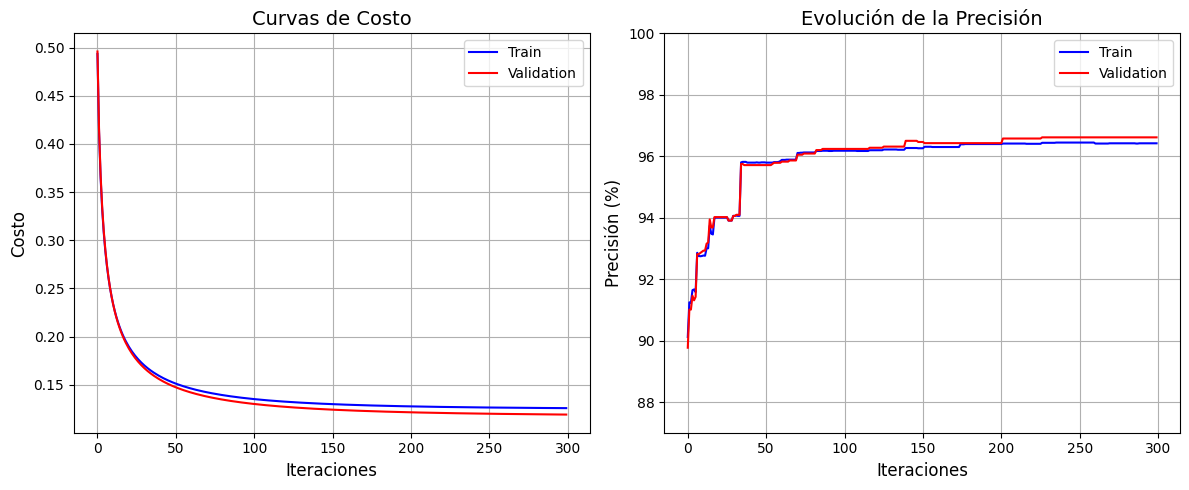

In [10]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_cost, label='Train', color='blue')
plt.plot(val_cost, label='Validation', color='red')
plt.title('Curvas de Costo', fontsize=14)
plt.xlabel('Iteraciones', fontsize=12)
plt.ylabel('Costo', fontsize=12)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train', color='blue')
plt.plot(val_acc, label='Validation', color='red')
plt.title('Evolución de la Precisión', fontsize=14)
plt.xlabel('Iteraciones', fontsize=12)
plt.ylabel('Precisión (%)', fontsize=12)
plt.legend()
plt.ylim(87, 100)
plt.grid(True)
plt.tight_layout()
plt.show()


## Resultados Finales

In [11]:
test_acc = accuracy(X_test, y_test, theta)

print(f"\nPrecisión Final:")
print(f"- Train: {train_acc[-1]:.2f}%")
print(f"- Validación: {val_acc[-1]:.2f}%")
print(f"- Test: {test_acc:.2f}%")
print("\nTheta óptimo:", theta)


Precisión Final:
- Train: 96.42%
- Validación: 96.61%
- Test: 95.60%

Theta óptimo: [-2.76037632  0.          4.15554677  0.0358381   0.29548992  0.30094717
 -0.13716841  0.17653159]


## PREDICCIONES SOBRE EJEMPLOS DEL TEST

In [38]:
inverse_type_traveller = {
    0: "Solo",
    1: "Family", 
    2: "Business",
    3: "Couple"
}

sample_indices = np.random.choice(len(X_test), size=5, replace=False)
sample_X = X_test[sample_indices]
sample_X_original = X_original[sample_indices]
sample_y = y_test[sample_indices]

print("\n" + "="*50)
print("PREDICCIONES SOBRE EJEMPLOS DEL CONJUNTO DE TEST")
print("="*50 + "\n")

for i, (features, original, true_label) in enumerate(zip(sample_X, sample_X_original, sample_y)):
    features_original = original  
    
    prob = sigmoid(np.dot(features, theta))
    prediction = 1 if prob >= 0.5 else 0
    
    print(f"\nEjemplo {i+1}:")
    print("-"*30)
    print(f"Tipo de viajero: {inverse_type_traveller.get(int(features_original[0]))}")
    print(f"Rating general: {features_original[1]:.1f}")
    print(f"Rating de colas: {features_original[2]:.1f}")
    print(f"Rating limpieza terminal: {features_original[3]:.1f}")
    print(f"Rating comida/bebidas: {features_original[4]:.1f}")
    print(f"Rating tiendas: {features_original[5]:.1f}")
    print(f"Rating WiFi: {features_original[6]:.1f}")
    print("\n" + ">"*10 + " PREDICCIÓN " + "<"*10)
    print(f"Probabilidad: {prob:.4f}")
    print(f"Predicción: {'Recomendaría' if prediction == 1 else 'No recomendaría'}")
    print(f"Real: {'Recomendaría' if true_label == 1 else 'No recomendaría'}")
    print("¿Acierto?:", "✅" if prediction == true_label else "❌")
    print("-"*30 + "\n")


PREDICCIONES SOBRE EJEMPLOS DEL CONJUNTO DE TEST


Ejemplo 1:
------------------------------
Tipo de viajero: Business
Rating general: 1.0
Rating de colas: 3.0
Rating limpieza terminal: 3.0
Rating comida/bebidas: 2.0
Rating tiendas: 3.0
Rating WiFi: 2.0

>>>>>>>>>> PREDICCIÓN <<<<<<<<<<
Probabilidad: 0.0068
Predicción: No recomendaría
Real: No recomendaría
¿Acierto?: ✅
------------------------------


Ejemplo 2:
------------------------------
Tipo de viajero: Business
Rating general: 2.0
Rating de colas: 3.0
Rating limpieza terminal: 3.0
Rating comida/bebidas: 2.0
Rating tiendas: 3.0
Rating WiFi: 2.0

>>>>>>>>>> PREDICCIÓN <<<<<<<<<<
Probabilidad: 0.0369
Predicción: No recomendaría
Real: No recomendaría
¿Acierto?: ✅
------------------------------


Ejemplo 3:
------------------------------
Tipo de viajero: Business
Rating general: 2.0
Rating de colas: 3.0
Rating limpieza terminal: 3.0
Rating comida/bebidas: 2.0
Rating tiendas: 3.0
Rating WiFi: 2.0

>>>>>>>>>> PREDICCIÓN <<<<<<<<<<
Pro